In [16]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import re


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [17]:
df = pd.read_csv('../scraping/allmovies.csv')

# # Display the cleaned dataset
df.head()

,Movie Name,Genres,Time,Rating,Top Cast
0,Venom: The Last Dance\r\n(2024),"Action, Science Fiction, Adventure, Thriller",1h 49m,68,टॉम हार्डीEddie Brock / Venom Chiwetel Ej...
1,Moana 2\r\n(2024),"Animation, Adventure, Family, Comedy",1h 40m,69,Auliʻi CravalhoMoana (voice) ड्वेन जॉनसनM...
2,Elevation\r\n(2024),"Action, Science Fiction, Thriller",1h 31m,65,एंथनी मैकीWill Morena BaccarinNina M...
3,Absolution\r\n(2024),"Action, Crime, Thriller",1h 52m,61,लियाम नीसनThug Ron PerlmanCharlie Conner ...
4,Red One\r\n(2024),"Action, Comedy, Fantasy",2h 4m,70,ड्वेन जॉनसनCallum Drift Chris EvansJack O...


In [18]:
# 1. Remove newline characters from 'Movie Name'
df['Movie Name'] = df['Movie Name'].str.replace(r'\r\n', ' ', regex=True)

In [19]:
# 2. Clean the 'Time' column
def convert_time_to_minutes(time_str):
    """Convert time in format '1h 49m' to total minutes."""
    
    time_str = time_str.replace(" ",'')
    time_str = time_str.replace('m', '')

    time = time_str.split('h')

    hours = 0
    mins = 0

    if 'h' in time_str :
        hours = int(time[0])
        if time[1] == '' :
            mins = 0
        else :
            mins = int(time[1])
    elif len(time) == 1 :
        mins = int(time[0])
    else :
        hours = 0
        mins = 0

    return hours*60 + mins

# Apply the conversion function
df['Time'] = df['Time'].apply(convert_time_to_minutes)

# Check for remaining NaN values in the 'Time' column
nan_times = df[df['Time'].isna()]
print("Entries with NaN in 'Time':")
print(nan_times)

Entries with NaN in 'Time':
Empty DataFrame
Columns: [Movie Name, Genres, Time, Rating, Top Cast]
Index: []


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Movie Name  95 non-null     object
 1   Genres      95 non-null     object
 2   Time        95 non-null     int64 
 3   Rating      95 non-null     int64 
 4   Top Cast    95 non-null     object
dtypes: int64(2), object(3)
memory usage: 3.8+ KB


In [21]:
# Checking for Null Values

df.isnull().sum()

Movie Name    0
Genres        0
Time          0
Rating        0
Top Cast      0
dtype: int64

In [22]:
# Checking for Outliers

df.describe()

,Time,Rating
count,95.000000,95.000000
mean,104.831579,67.263158
std,28.209193,10.929377
min,11.000000,0.000000
25%,92.000000,62.000000
50%,105.000000,68.000000
75%,116.500000,72.000000
max,198.000000,97.000000


In [23]:
# Check for Duplicates

df.duplicated().sum()

0

In [24]:
def is_english(var) :
    for i in range(0,len(var)) :
        if ord(var[i]) > 200 :
            return False 
    return True   
        
is_english("Eल")

False

In [25]:
# Want to See if a movie name is in English lang or not

# Searching for a row in a dataset :
# if false remove whole row from the dataset

df["Movie Name"].apply(is_english)

0      True
1      True
2      True
3      True
4      True
      ...  
90     True
91     True
92    False
93     True
94     True
Name: Movie Name, Length: 95, dtype: bool

In [26]:
# Apply the function and filter rows
df["Is_English"] = df["Movie Name"].apply(is_english)
df_filtered = df[df["Is_English"]]  # Keep only rows where Is_English is True

# Drop the Is_English column
df_filtered = df_filtered.drop(columns=["Is_English"])

print("Filtered Dataset:")
print(df_filtered)

Filtered Dataset:
                                         Movie Name  \
0                      Venom: The Last Dance (2024)   
1                                    Moana 2 (2024)   
2                                  Elevation (2024)   
3                                 Absolution (2024)   
4                                    Red One (2024)   
..                                              ...   
87                              F Marry Kill (2024)   
90                   Beetlejuice Beetlejuice (2024)   
91             My Hero Academia: You're Next (2024)   
93  Female Teacher: In Front of the Students (1982)   
94                        365 Days: This Day (2022)   

                                           Genres  Time  Rating  \
0    Action, Science Fiction, Adventure, Thriller   109      68   
1            Animation, Adventure, Family, Comedy   100      69   
2               Action, Science Fiction, Thriller    91      65   
3                         Action, Crime, Thriller   1

In [28]:
df_filtered

,Movie Name,Genres,Time,Rating,Top Cast
0,Venom: The Last Dance (2024),"Action, Science Fiction, Adventure, Thriller",109,68,टॉम हार्डीEddie Brock / Venom Chiwetel Ej...
1,Moana 2 (2024),"Animation, Adventure, Family, Comedy",100,69,Auliʻi CravalhoMoana (voice) ड्वेन जॉनसनM...
2,Elevation (2024),"Action, Science Fiction, Thriller",91,65,एंथनी मैकीWill Morena BaccarinNina M...
3,Absolution (2024),"Action, Crime, Thriller",112,61,लियाम नीसनThug Ron PerlmanCharlie Conner ...
4,Red One (2024),"Action, Comedy, Fantasy",124,70,ड्वेन जॉनसनCallum Drift Chris EvansJack O...
...,...,...,...,...,...
87,F Marry Kill (2024),"Comedy, Thriller",97,67,Lucy HaleEva Vaugh Virginia GardnerKelly ...
90,Beetlejuice Beetlejuice (2024),"Comedy, Fantasy, Horror",105,71,Michael KeatonBeetlejuice विनोना रायडरLyd...
91,My Hero Academia: You're Next (2024),"Animation, Action, Adventure, Science Fiction",110,68,Daiki YamashitaIzuku Midoriya (voice) Nob...
93,Female Teacher: In Front of the Students (1982),"Drama, Mystery, Horror",69,66,Rushia SantôReiko / Teacher Rina OkaKumi ...


In [35]:
# Genre - One Hot Encoding 

pd.get_dummies(df_filtered, columns=['Genres'])

,Movie Name,Time,Rating,Top Cast,"Genres_Action, Adventure, Animation, Fantasy","Genres_Action, Adventure, Drama","Genres_Action, Adventure, Fantasy, Animation","Genres_Action, Adventure, History","Genres_Action, Adventure, Thriller","Genres_Action, Comedy, Crime, Thriller, Adventure",...,Genres_Music,Genres_Romance,"Genres_Romance, Drama","Genres_Science Fiction, Adventure, Action","Genres_Science Fiction, Horror, Thriller","Genres_Science Fiction, Thriller, Horror","Genres_TV Movie, Family, Comedy, Horror, Animation","Genres_Thriller, Adventure, Action, Science Fiction","Genres_Thriller, Horror, Crime, Mystery",Genres_War
0,Venom: The Last Dance (2024),109,68,टॉम हार्डीEddie Brock / Venom Chiwetel Ej...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Moana 2 (2024),100,69,Auliʻi CravalhoMoana (voice) ड्वेन जॉनसनM...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Elevation (2024),91,65,एंथनी मैकीWill Morena BaccarinNina M...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Absolution (2024),112,61,लियाम नीसनThug Ron PerlmanCharlie Conner ...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Red One (2024),124,70,ड्वेन जॉनसनCallum Drift Chris EvansJack O...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,F Marry Kill (2024),97,67,Lucy HaleEva Vaugh Virginia GardnerKelly ...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
90,Beetlejuice Beetlejuice (2024),105,71,Michael KeatonBeetlejuice विनोना रायडरLyd...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91,My Hero Academia: You're Next (2024),110,68,Daiki YamashitaIzuku Midoriya (voice) Nob...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
93,Female Teacher: In Front of the Students (1982),69,66,Rushia SantôReiko / Teacher Rina OkaKumi ...,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:

df_genres = df_filtered['Genres']
df_genres

0      Action, Science Fiction, Adventure, Thriller
1              Animation, Adventure, Family, Comedy
2                 Action, Science Fiction, Thriller
3                           Action, Crime, Thriller
4                           Action, Comedy, Fantasy
                          ...                      
87                                 Comedy, Thriller
90                          Comedy, Fantasy, Horror
91    Animation, Action, Adventure, Science Fiction
93                           Drama, Mystery, Horror
94                                   Romance, Drama
Name: Genres, Length: 77, dtype: object

In [53]:
unique_genres = []

for genres in df_genres :
    genres = genres.split(",")
    for j in genres :
        j = j.replace("\xa0", '')
        if j not in unique_genres :
            unique_genres.append(j)
        else :
            continue 

print(unique_genres)

['Action', 'Science Fiction', 'Adventure', 'Thriller', 'Animation', 'Family', 'Comedy', 'Crime', 'Fantasy', 'Mystery', 'History', 'Drama', 'Romance', 'TV Movie', 'Horror', 'War', 'Music']


In [63]:
temp_genres = df_genres.to_frame()
temp_genres

,Genres
0,"Action, Science Fiction, Adventure, Thriller"
1,"Animation, Adventure, Family, Comedy"
2,"Action, Science Fiction, Thriller"
3,"Action, Crime, Thriller"
4,"Action, Comedy, Fantasy"
...,...
90,"Comedy, Fantasy, Horror"
91,"Animation, Action, Adventure, Science Fiction"
93,"Drama, Mystery, Horror"
94,"Romance, Drama"


In [ ]:
for i in unique_genres :
    temp_genres.insert(0, i, -1)

In [65]:
temp_genres

,Music,War,Horror,TV Movie,Romance,Drama,History,Mystery,Fantasy,Crime,Comedy,Family,Animation,Thriller,Adventure,Science Fiction,Action,Genres
0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"Action, Science Fiction, Adventure, Thriller"
1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"Animation, Adventure, Family, Comedy"
2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"Action, Science Fiction, Thriller"
3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"Action, Crime, Thriller"
4,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"Action, Comedy, Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"Comedy, Fantasy, Horror"
91,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"Animation, Action, Adventure, Science Fiction"
93,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"Drama, Mystery, Horror"
94,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,"Romance, Drama"


In [56]:
df_genres

0          Action, Science Fiction, Adventure, Thriller
1                  Animation, Adventure, Family, Comedy
2                     Action, Science Fiction, Thriller
3                               Action, Crime, Thriller
4                               Action, Comedy, Fantasy
                              ...                      
90                              Comedy, Fantasy, Horror
91        Animation, Action, Adventure, Science Fiction
93                               Drama, Mystery, Horror
94                                       Romance, Drama
Action                                                0
Name: Genres, Length: 78, dtype: object

In [29]:

# Count the number of movies in each genre
genre_counts = genres.sum().sort_values(ascending=False)

# Plot the distribution of genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()


NameError: name 'genres' is not defined

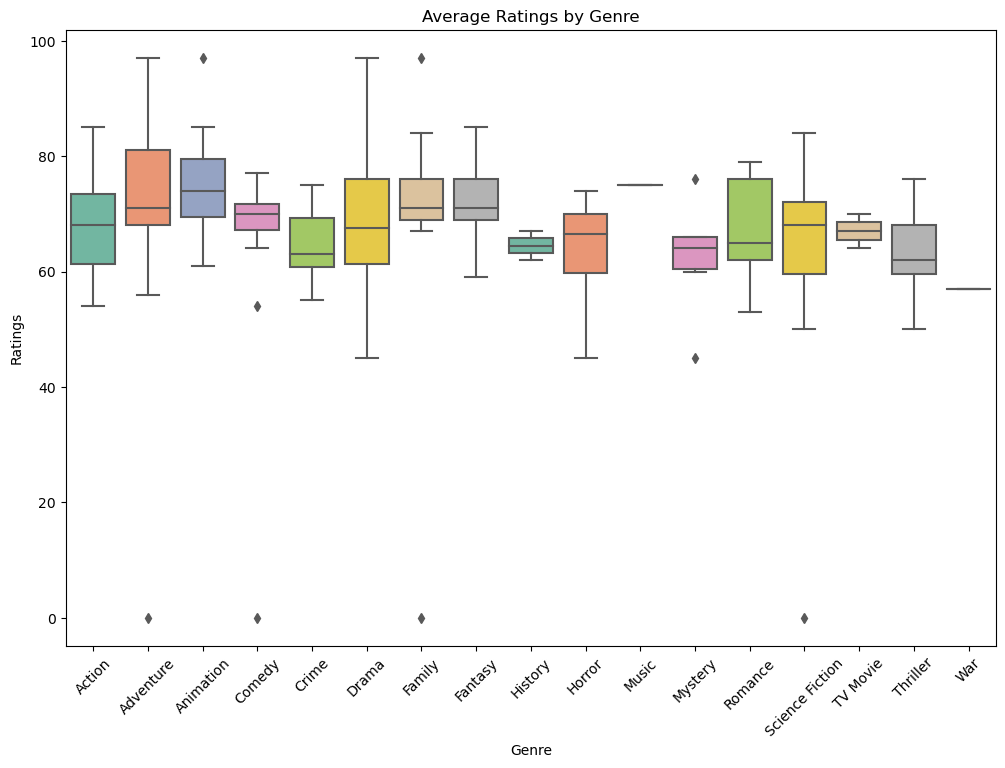

In [ ]:
# Assuming 'Rating' is the column for ratings
df_genre_ratings = pd.concat([df['Rating'], genres], axis=1)

# Reshape data to long format for each genre
df_genre_ratings_long = df_genre_ratings.melt(id_vars=['Rating'], var_name='Genre', value_name='Has_Genre')

# Filter only the rows where a genre is present (Has_Genre is 1)
df_genre_ratings_long = df_genre_ratings_long[df_genre_ratings_long['Has_Genre'] == 1]

# Create a box plot for ratings grouped by genre
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_genre_ratings_long, x='Genre', y='Rating', palette='Set2')
plt.title('Average Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.xticks(rotation=45)
plt.show()


c:\Users\luqma\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2360 (\N{DEVANAGARI LETTER SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\luqma\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\luqma\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2381 (\N{DEVANAGARI SIGN VIRAMA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\luqma\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2346 (\N{DEVANAGARI LETTER PA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\luqma\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\luqma\anaconda3\

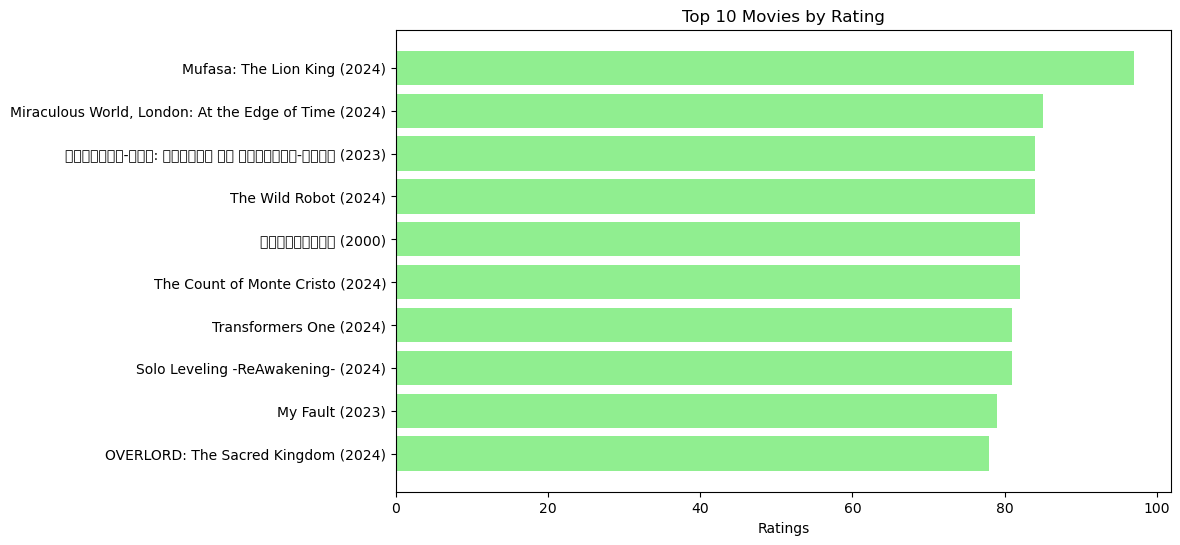

In [ ]:
# Sort movies by rating and select top 10
top_movies = df[['Movie Name', 'Rating']].sort_values(by='Rating', ascending=False).head(10)

# Plot the top 10 movies by rating
plt.figure(figsize=(10, 6))
plt.barh(top_movies['Movie Name'], top_movies['Rating'], color='lightgreen')
plt.xlabel('Ratings')
plt.title('Top 10 Movies by Rating')
plt.gca().invert_yaxis()
plt.show()


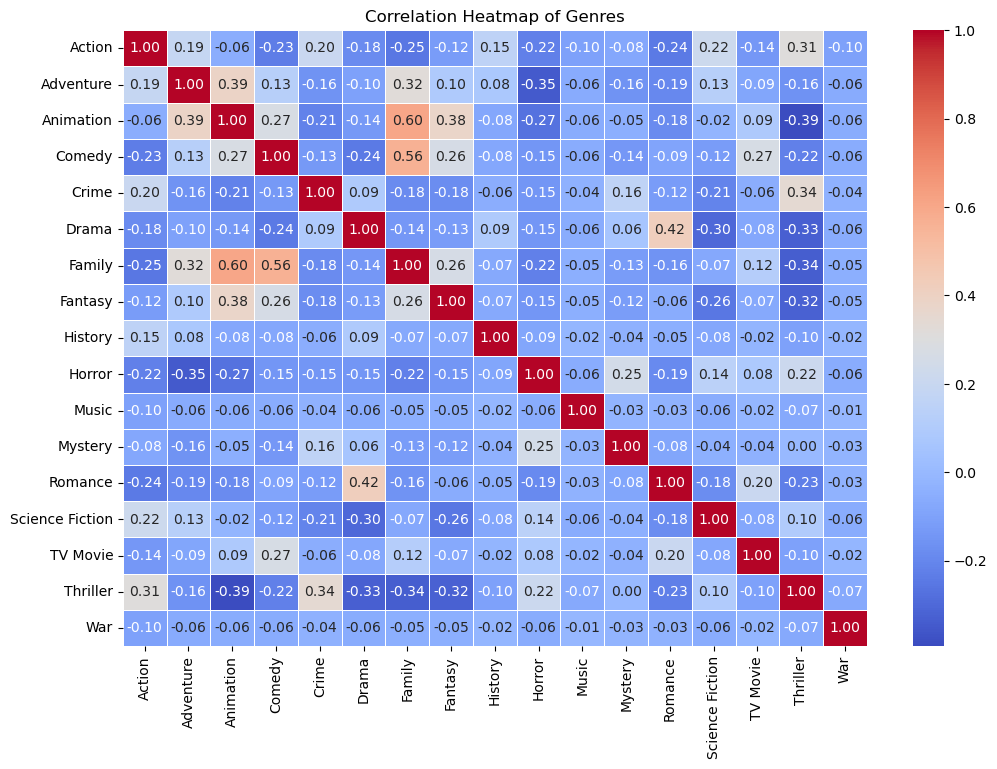

In [ ]:
# Calculate correlation matrix between genres and ratings
genre_columns = ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Drama', 'Family', 'Fantasy', 
                 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War']
genre_corr = df[genre_columns].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(genre_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Genres')
plt.show()


      Time  Time_in_hours
0   1h 49m       1.816667
1   1h 40m       1.666667
2   1h 31m       1.516667
3   1h 52m       1.866667
4    2h 4m       2.066667
..     ...            ...
90  1h 45m       1.750000
91  1h 50m       1.833333
92  2h 20m       2.333333
93   1h 9m       1.150000
94  1h 51m       1.850000

[95 rows x 2 columns]
    Time_in_hours  Time_bins
0        1.816667  1.5-2 hrs
1        1.666667  1.5-2 hrs
2        1.516667  1.5-2 hrs
3        1.866667  1.5-2 hrs
4        2.066667  2-2.5 hrs
..            ...        ...
90       1.750000  1.5-2 hrs
91       1.833333  1.5-2 hrs
92       2.333333  2-2.5 hrs
93       1.150000  1-1.5 hrs
94       1.850000  1.5-2 hrs

[95 rows x 2 columns]


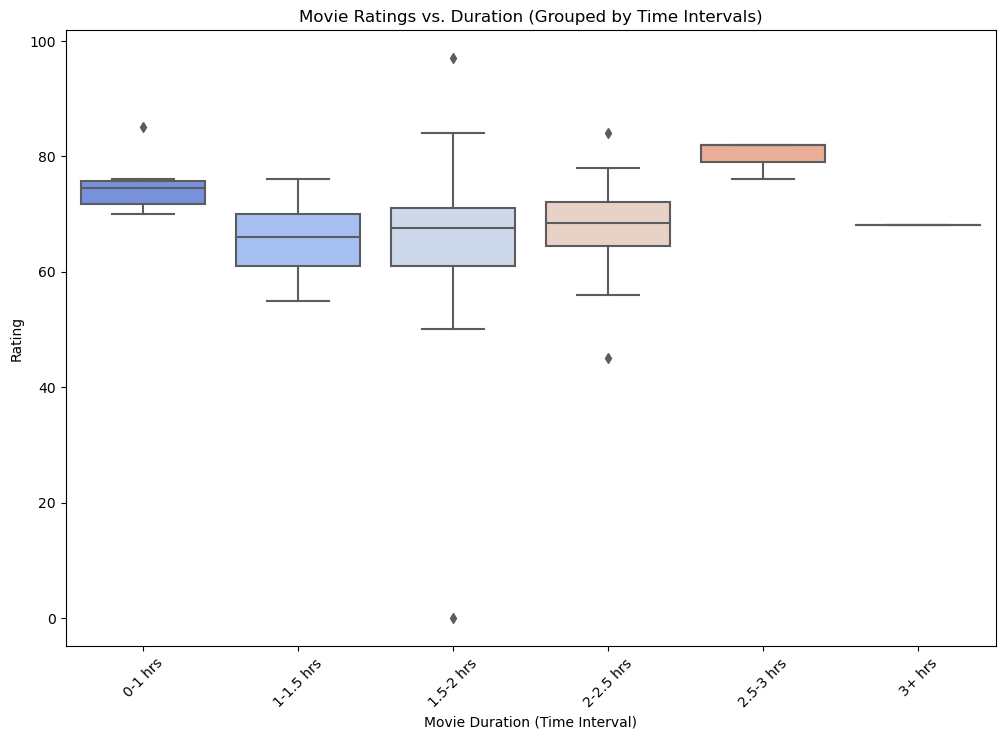

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace with your actual dataframe)
data = pd.read_csv('../scraping/allmovies.csv')
df = pd.DataFrame(data)

# Function to clean and convert 'Time' column to hours
def convert_time_to_hours(time_str):
    # Initialize hours and minutes
    hours = 0
    minutes = 0
    
    # Extract hours and minutes using regex
    hour_match = re.search(r'(\d+)\s*h', time_str)
    minute_match = re.search(r'(\d+)\s*m', time_str)
    
    if hour_match:
        hours = int(hour_match.group(1))
    
    if minute_match:
        minutes = int(minute_match.group(1))
    
    # Return total time in hours
    return hours + minutes / 60

# Apply the conversion function to the 'Time' column
df['Time_in_hours'] = df['Time'].apply(convert_time_to_hours)

# Check the conversion result
print(df[['Time', 'Time_in_hours']])

# Define time bins and labels
bins = [0, 1, 1.5, 2, 2.5, 3, 5]
labels = ['0-1 hrs', '1-1.5 hrs', '1.5-2 hrs', '2-2.5 hrs', '2.5-3 hrs', '3+ hrs']
df['Time_bins'] = pd.cut(df['Time_in_hours'], bins=bins, labels=labels, right=False)

# Check the binning result
print(df[['Time_in_hours', 'Time_bins']])

# Plot the distribution of ratings by movie duration (in the time bins)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Time_bins', y='Rating', palette='coolwarm')
plt.title('Movie Ratings vs. Duration (Grouped by Time Intervals)')
plt.xlabel('Movie Duration (Time Interval)')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()


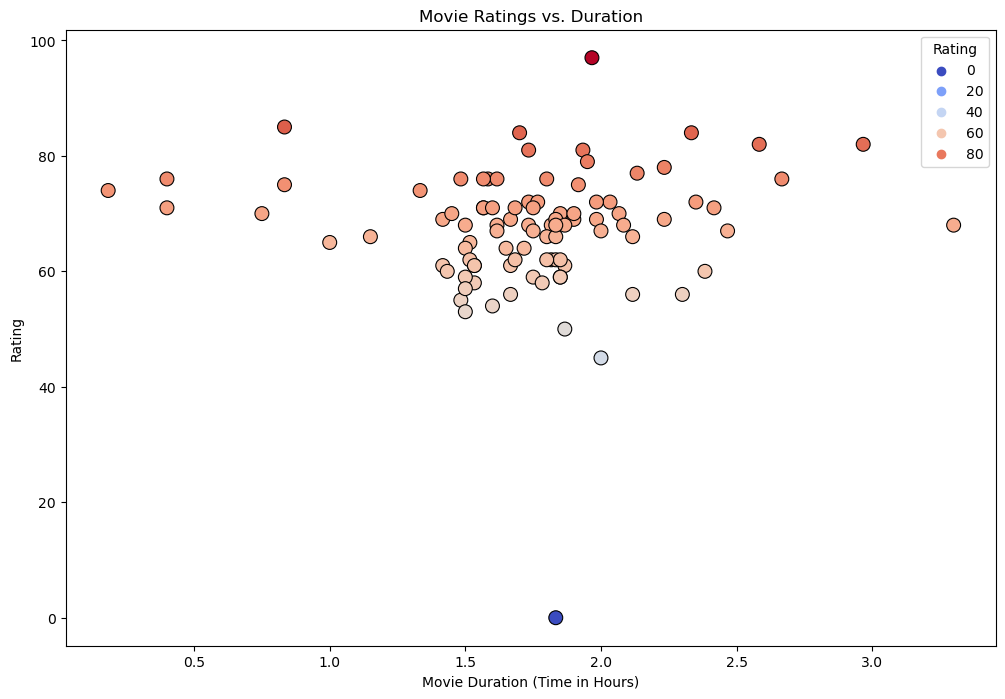

In [ ]:
# Plotting a scatter plot of Movie Ratings vs. Movie Duration
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Time_in_hours', y='Rating', hue='Rating', palette='coolwarm', s=100, edgecolor='black')
plt.title('Movie Ratings vs. Duration')
plt.xlabel('Movie Duration (Time in Hours)')
plt.ylabel('Rating')
plt.show()


In [23]:
print(df.columns)

Index(['Movie Name', 'Genres', 'Time', 'Rating', 'Top Cast', 'Time_in_hours',
       'Time_bins'],
      dtype='object')


## Above : Everything Feels right (I Assume)

What I did ?

- Data Cleaning
  - Divided Genres into subfield - action, comedy, crime, thriller, etc
  - Converted Time into Time-Frames (0.5 - 1.0, 1.0 - 1.5, and so on)
- Some Visualizations

# Below : tried but wrong 

In [27]:
# # Apply the function and filter rows
# df["Is_English"] = df["Top Cast"].apply(is_english)
# df_cast_filtered = df[df["Is_English"]]  # Keep only rows where Is_English is True

# # Drop the Is_English column
# df_cast_filtered = df_cast_filtered.drop(columns=["Is_English"])

# print("Filtered Dataset:")
# print(df_cast_filtered)

Filtered Dataset:
                                           Movie Name  \
8                         Watchmen: Chapter II (2024)   
15                    Sidelined: The QB and Me (2024)   
19                           Weekend in Taipei (2024)   
20                                  Arena Wars (2024)   
22                                     Heretic (2024)   
25                              Alien: Romulus (2024)   
26                                      Levels (2024)   
32                                    The Moor (2024)   
33                 Solo Leveling -ReAwakening- (2024)   
36                                  Classified (2024)   
40                                    Cash Out (2024)   
47                                     Remnant (2024)   
52                                Subservience (2024)   
53                OVERLORD: The Sacred Kingdom (2024)   
57                Battle for the Western Front (2022)   
62                            Skin. Like. Sun. (2010)   
64           

In [24]:

# # 2. Clean the 'Top Cast' column
# def clean_top_cast(top_cast):
#     if isinstance(top_cast, str):  # Check if the value is a string
#         # Split by spaces to separate cast names
#         actors = []
#         for actor in top_cast.split(' '):
#             if len(actor) > 1:  # Include only valid names
#                 actors.append(actor.strip())
#         return ', '.join(actors)
#     return top_cast

# df['Top Cast'] = df['Top Cast'].apply(clean_top_cast)

# df['Top Cast']

In [25]:

# Sample data (you can replace this with your actual dataset)
# data = {
#     'Movie Name': ['Venom: The Last Dance\r\n(2024)', 'Moana 2\r\n(2024)', 'Elevation\r\n(2024)', 'Absolution\r\n(2024)', 'Red One\r\n(2024)'],
#     'Time': [109.0, 100.0, 91.0, 112.0, 124.0],
#     'Rating': [68.0, 69.0, 65.0, 61.0, 70.0],
#     'Top Cast': ['टॉम हार्डीEddie Brock / Venom Chiwetel Ej...', 'Auliʻi CravalhoMoana (voice) ड्वेन जॉनसनM...', 
#                  'एंथनी मैकीWill Morena BaccarinNina M...', 'लियाम नीसनThug Ron PerlmanCharlie Conner ...', 
#                  'ड्वेन जॉनसनCallum Drift Chris EvansJack O...']
# }

# data = pd.read_csv('../scraping/allmovies.csv')

# df = pd.DataFrame(data)

# # 1. Remove newline characters from 'Movie Name'
# df['Movie Name'] = df['Movie Name'].str.replace(r'\r\n', ' ', regex=True)

# # 2. Clean the 'Top Cast' column: Separate cast names correctly
# def clean_top_cast(top_cast):
#     if isinstance(top_cast, str):  # Check if the value is a string
#         # Split by known patterns (e.g., names in Hindi or English followed by roles or positions)
#         actors = []
#         for actor in top_cast.split(' '):
#             # Assuming a mix of Hindi and English actor names (basic rule: check for names without roles)
#             if len(actor) > 1:  # basic check for actor name length (can be adjusted)
#                 actors.append(actor.strip())
#         return ', '.join(actors)
#     return top_cast  # Return as is if it's not a string

# df['Top Cast'] = df['Top Cast'].apply(clean_top_cast)

# # 3. Clean the 'Time' column: Ensure it only contains numbers (no NaN or strings)
# df['Time'] = pd.to_numeric(df['Time'], errors='coerce')

# # Display cleaned dataset
# df.head()


In [26]:
# import pandas as pd

# # Sample data (you can replace this with your actual dataset)
# data = pd.read_csv('../scraping/allmovies.csv')

# # Load data into a pandas DataFrame
# df = pd.DataFrame(data)

# # Clean the 'Genres' column by splitting and creating dummy variables for each genre
# df['Genres'] = df['Genres'].str.split(',').apply(lambda x: [genre.strip() for genre in x])

# # One-hot encoding for 'Genres'
# genre_dummies = df['Genres'].apply(pd.Series).stack().str.get_dummies().sum()

# # Combine back with the original dataset
# df = pd.concat([df.drop(columns='Genres'), genre_dummies], axis=1)

# # Clean the 'Time' column: Convert '1h 49m' to total minutes (e.g., 109 minutes)
# def convert_time_to_minutes(time_str):
#     if isinstance(time_str, str):  # Check if the time is a string
#         hours = 0
#         minutes = 0
#         time_str = time_str.replace(' ', '')  # Remove any spaces
#         if 'h' in time_str:
#             hours = int(time_str.split('h')[0])
#         if 'm' in time_str:
#             minutes = int(time_str.split('m')[0].split('h')[-1])
#         return hours * 60 + minutes
#     else:
#         return None  # Return None for non-string values

# # Apply the conversion function to the 'Time' column
# df['Time'] = df['Time'].apply(convert_time_to_minutes)

# # Clean the 'Top Cast' column: Ensure it has proper spacing and format
# def clean_top_cast(top_cast):
#     if isinstance(top_cast, str):  # Check if the value is a string
#         return ', '.join([actor.strip() for actor in top_cast.split(',')])
#     return top_cast  # Return as is if it's not a string

# df['Top Cast'] = df['Top Cast'].apply(clean_top_cast)

# # Display cleaned dataset
# df.head()


In [27]:
# # Plot distribution of ratings by movie duration (Time)
# plt.figure(figsize=(12, 8))
# sns.scatterplot(data=df, x='Time', y='Rating', hue='Rating', palette='coolwarm', s=100, edgecolor='black')
# plt.title('Movie Ratings vs. Duration')
# plt.xlabel('Movie Duration (Time)')
# plt.ylabel('Rating')
# plt.show()

In [28]:
# dataset = pd.read_csv('../scraping/allmovies.csv', delimiter=';', encoding="utf-8")
# print(dataset.head())

In [29]:
# from io import StringIO

# df = pd.read_csv(StringIO('../scraping/allmovies.csv'), sep=",")

In [30]:
# print(df.head())  # Display first few rows

In [31]:
# # Ensure there are no trailing or leading spaces
# df.columns = df.columns.str.strip()

# # Split the data into columns if it's concatenated
# df[['Movie Name', 'Genres', 'Time', 'Rating', 'Top Cast']] = df['Movie Name,Genres,Time,Rating,Top Cast'].str.split(',', n=4, expand=True)

# # Drop the old concatenated column
# df.drop('Movie Name,Genres,Time,Rating,Top Cast', axis=1, inplace=True)

# # Preview the cleaned dataset
# df.head()

In [32]:
# df = df.applymap(lambda x: x.strip().replace("\r\n", " ") if isinstance(x, str) else x)
# df.head()

In [33]:
# import pandas as pd

# # Load the dataset (replace 'filename.csv' with your actual file path)
# df = pd.read_csv('../scraping/allmovies.csv', encoding='utf-8', header=None, names=['Movie_Data'])

# # Split the single column into multiple columns
# df_split = df['Movie_Data'].str.split(',', n=4, expand=True)
# df_split.columns = ['Movie Name', 'Genres', 'Time', 'Rating', 'Top Cast']

# # Remove newlines and trim spaces
# for col in df_split.columns:
#     df_split[col] = df_split[col].str.replace(r'\r\n', '', regex=True).str.strip()

# # Convert columns to appropriate data types (e.g., Rating to numeric)
# df_split['Rating'] = pd.to_numeric(df_split['Rating'], errors='coerce')

# # Preview the cleaned data
# print(df_split.head())

# # Save the cleaned data to a new CSV (optional)
# df_split.to_csv('cleaned_movies_dataset.csv', index=False)


In [34]:
# import pandas as pd

# # Load the dataset (replace with your actual file path)
# df = pd.read_csv('../scraping/allmovies.csv', encoding='utf-8', header=None, names=['Movie_Data'])

# # Split the single column into multiple columns
# df_split = df['Movie_Data'].str.split(',', n=4, expand=True)
# df_split.columns = ['Movie Name', 'Genres', 'Time', 'Rating', 'Top Cast']

# # Remove newlines and trim spaces
# for col in df_split.columns:
#     df_split[col] = df_split[col].str.replace(r'\r\n', '', regex=True).str.strip()

# # Convert 'Rating' to numeric
# df_split['Rating'] = pd.to_numeric(df_split['Rating'], errors='coerce')

# # Handle 'Time' (convert to minutes if in "1h 40m" format)
# def convert_time_to_minutes(time_str):
#     if isinstance(time_str, str):
#         hours, minutes = 0, 0
#         if 'h' in time_str:
#             parts = time_str.split('h')
#             hours = int(parts[0].strip())
#             if 'm' in parts[1]:
#                 minutes = int(parts[1].strip('m').strip())
#         elif 'm' in time_str:
#             minutes = int(time_str.strip('m').strip())
#         return hours * 60 + minutes
#     return None

# df_split['Time'] = df_split['Time'].apply(convert_time_to_minutes)

# # Handle missing values (optional)
# df_split.fillna({'Rating': df_split['Rating'].mean(), 'Time': df_split['Time'].mean()}, inplace=True)

# # Ensure column names are as desired
# df_split = df_split[['Movie Name', 'Genres', 'Time', 'Rating', 'Top Cast']]

# # Preview the cleaned dataset
# print(df_split.head())

# # Save the cleaned data to a new CSV (optional)
# df_split.to_csv('cleaned_movies_dataset.csv', index=False)


In [35]:
# import pandas as pd

# # Load the dataset (replace 'filename.csv' with your actual file path)
# df = pd.read_csv('../scraping/allmovies.csv', encoding='utf-8', header=None, names=['Movie_Data'])

# # Split the single column into multiple columns
# df_split = df['Movie_Data'].str.split(',', n=4, expand=True)
# df_split.columns = ['Movie Name', 'Genres', 'Time', 'Rating', 'Top Cast']

# # Remove newlines and trim spaces from all columns
# for col in df_split.columns:
#     df_split[col] = df_split[col].str.replace(r'\r\n', '', regex=True).str.strip()

# # Convert 'Rating' to numeric (since it's currently a string)
# df_split['Rating'] = pd.to_numeric(df_split['Rating'], errors='coerce')

# # Now, run describe to get the statistical summary
# print(df_split.describe(include='all'))  # 'include=all' will give you both numeric and object summary


In [36]:
# import pandas as pd

# # Load the dataset
# df = pd.read_csv('../scraping/allmovies.csv', encoding='utf-8', header=None, names=['Movie_Data'])

# # Check the first few rows of the dataset to understand its structure
# print(df.head())

# # Split the 'Movie_Data' column into multiple columns
# df_split = df['Movie_Data'].str.split(',', n=4, expand=True)

# # Check the first few rows of the split data
# print(df_split.head())

# # Assign appropriate column names
# df_split.columns = ['Movie Name', 'Genres', 'Time', 'Rating', 'Top Cast']

# # Check the columns and data of df_split
# print("Columns in df_split:", df_split.columns)
# print(df_split.head())

# # Remove newlines and trim spaces from all columns
# for col in df_split.columns:
#     df_split[col] = df_split[col].str.replace(r'\r\n', '', regex=True).str.strip()

# # Convert 'Rating' to numeric
# df_split['Rating'] = pd.to_numeric(df_split['Rating'], errors='coerce')

# # Check the description of the cleaned DataFrame
# print(df_split.describe(include='all'))


In [37]:
# import pandas as pd

# # Load the dataset
# df = pd.read_csv('../scraping/allmovies.csv')

# # Remove extra spaces in column names
# df.columns = df.columns.str.strip()

# # Preprocessing 'Genres' column - ensuring no extra spaces and splitting by commas
# df['Genres'] = df['Genres'].apply(lambda x: ', '.join(sorted(set(x.split(',')))) if isinstance(x, str) else x)

# # Clean 'Time' column to remove extra spaces and unwanted characters (like 'h' and 'm')
# df['Time'] = df['Time'].str.replace('h', ' hours').str.replace('m', ' minutes').str.strip()

# # Clean 'Rating' column - converting to numeric and handling any potential errors
# df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# # Remove leading/trailing spaces in 'Top Cast'
# df['Top Cast'] = df['Top Cast'].apply(lambda x: ' '.join([name.strip() for name in str(x).split() if name.strip()]))

# # Apply pd.get_dummies to the 'Genres' column, drop the first to avoid multicollinearity
# df = pd.get_dummies(df, columns=['Genres'], drop_first=True)

# # Save the cleaned and processed data to a new CSV file
# df.to_csv('cleaned_movies.csv', index=False)

# # Show the cleaned dataset
# df.head()  # Display the first few rows to check the changes


In [38]:
# print(df.columns)

In [39]:
# print(df_split.columns)

In [40]:
# print(df_split.info())  # Get column data types and missing values

In [41]:
# df_split.isnull().sum()

In [42]:
# df_split.describe()

In [43]:
# df_split.duplicated().sum()

In [44]:
# dataset = pd.get_dummies(df_split, drop_first=True).astype(str,float)
# dataset.head()

In [45]:
# dataset = pd.get_dummies(df_split, columns=['Genres'], drop_first=True)
# df_split.head()

In [46]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Set up the plot style
# sns.set(style="whitegrid")

# # Plot the distribution of movie ratings
# plt.figure(figsize=(8, 6))
# sns.histplot(df_split['Rating'], bins=10, kde=True, color='skyblue')
# plt.title('Distribution of Movie Ratings')
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.show()


In [47]:
# # Extract the genres and split them into separate genres
# df_split['Genres'] = df_split['Genres'].str.split(',').apply(lambda x: [genre.strip() for genre in x])

# # Unnest the genres and count the frequency
# genre_list = [genre for sublist in df_split['Genres'] for genre in sublist]
# genre_counts = pd.Series(genre_list).value_counts()

# # Plot the top genres
# plt.figure(figsize=(10, 6))
# genre_counts.head(10).plot(kind='bar', color='salmon')
# plt.title('Top 10 Genres in the Movie Dataset')
# plt.xlabel('Genre')
# plt.ylabel('Frequency')
# plt.xticks(rotation=45)
# plt.show()


In [48]:
# # Convert time to minutes
# def time_to_minutes(time_str):
#     if 'h' in time_str and 'm' in time_str:
#         hours, minutes = time_str.split('h')
#         minutes = minutes.replace('m', '').strip()
#         return int(hours) * 60 + int(minutes)
#     elif 'h' in time_str:
#         return int(time_str.replace('h', '').strip()) * 60
#     elif 'm' in time_str:
#         return int(time_str.replace('m', '').strip())
#     else:
#         return None

# df_split['Duration (minutes)'] = df_split['Time'].apply(time_to_minutes)

# # Plot movie duration vs rating
# plt.figure(figsize=(10, 6))
# sns.scatterplot(x='Duration (minutes)', y='Rating', data=df_split, color='purple')
# plt.title('Movie Duration vs Rating')
# plt.xlabel('Duration (Minutes)')
# plt.ylabel('Rating')
# plt.show()


In [49]:
# from wordcloud import WordCloud

# # Join all the top cast names into a single string
# top_cast_str = ' '.join(df_split['Top Cast'].dropna())

# # Generate the word cloud
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(top_cast_str)

# # Plot the word cloud
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Most Frequent Top Cast')
# plt.show()


In [50]:
# # Sort movies by rating
# top_rated_movies = df_split.sort_values('Rating', ascending=False).head(10)

# # Plot the top 10 movies by rating
# plt.figure(figsize=(10, 6))
# sns.barplot(x='Rating', y='Movie Name', data=top_rated_movies, palette='coolwarm')
# plt.title('Top 10 Movies by Rating')
# plt.xlabel('Rating')
# plt.ylabel('Movie Name')
# plt.show()


In [51]:
# # Calculate the average rating by movie duration
# avg_rating_by_duration = df_split.groupby('Duration (minutes)')['Rating'].mean()

# # Plot average rating by duration
# plt.figure(figsize=(12, 6))
# avg_rating_by_duration.plot(kind='line', color='orange')
# plt.title('Average Rating by Movie Duration')
# plt.xlabel('Duration (Minutes)')
# plt.ylabel('Average Rating')
# plt.show()
